### import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import re

In [39]:
url = "http://127.0.0.1:8095/OTHER/core/other/jsonreport/?apikey=pbjh2cv3qv6u03ib3llfnpcq5c"
resp = requests.get(url=url)
with open("C:/Users/Cv/Desktop/127.0.0.1.json","w") as file:
    file.write(resp.text)
    file.close()
with open("C:/Users/Cv/Desktop/127.0.0.1.json","r") as f:
    data = json.load(f)
    length = len(data["site"][0]["alerts"])
    alert_names=[]
    alert_riskdesc = []
    alert_count = []
    for y in range(length-1):
        alert_names.append(str(data["site"][0]["alerts"][y]["name"]))
        alert_riskdesc.append(str(data["site"][0]["alerts"][y]["riskdesc"]))
        alert_count.append(str(data["site"][0]["alerts"][y]["count"]))
    print (alert_names)
    print (alert_riskdesc)
    print (alert_count)

['Cross-Domain JavaScript Source File Inclusion', 'X-Frame-Options Header Not Set', 'Web Browser XSS Protection Not Enabled', 'Absence of Anti-CSRF Tokens']
['Low (Medium)', 'Medium (Medium)', 'Low (Medium)', 'Low (Medium)']
['30', '1', '1', '2']


In [40]:
alert_count = list(map(int, alert_count))
index = np.arange(len(alert_names))

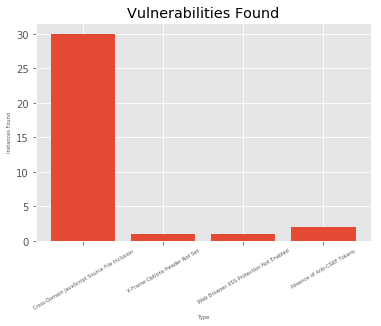

In [41]:
#plt.style.use('ggplot')
#plt.bar(index, alert_count)
#plt.xlabel('Type', fontsize=5)
#plt.ylabel('Instances Found', fontsize=5)
#plt.xticks(index, alert_names, fontsize=5, rotation=30)
#plt.title('Vulnerabilities Found')
#plt.show()

In [46]:
with open("C:/Users/Cv/Desktop/new2.html") as inf:
    html = inf.read()
    html = str(html)

#html = re.sub(r"{ y: 30078, label: \"High\" },\{ y: 26455,  label: \"Medium\" },{ y: 19709,  label: \"Low\" },{ y: 58400,  label: \"Informational\" }", string, txt)
#print (html)

re1='(\\{ y: 30078, label: "vul1" \\})'	# Curly Braces 1
data = """{ y: %s, label: "%s" }""" %(alert_count[0],alert_names[0])
rg = re.compile(re1)
html = re.sub(rg, data, html)

re2='(\\{ y: 26455,  label: "vul2" \\})'
data = """{ y: %s, label: "%s" }""" %(alert_count[1],alert_names[1])
rg = re.compile(re2)
html = re.sub(re2, data, html)

re3='(\\{ y: 19709,  label: "vul3" \\})'
data = """{ y: %s, label: "%s" }""" %(alert_count[2],alert_names[2])
rg = re.compile(re3)
html = re.sub(re3, data, html)

re4='(\\{ y: 58400,  label: "vul4" \\})'
data = """{ y: %s, label: "%s" }""" %(alert_count[3],alert_names[3])
rg = re.compile(re4)
html = re.sub(re4, data, html)

print(html)
html = str(html)

with open("C:/Users/Cv/Desktop/new3.html","w") as file:
    file.write(html)
    file.close



<!DOCTYPE HTML>
<html>
<head>  
<script>
window.onload = function () {

var chart = new CanvasJS.Chart("chartContainer", {
	animationEnabled: true,
	theme: "light2", // "light1", "light2", "dark1", "dark2"
	title:{
		text: "Vulnerabilities"
	},
	axisY: {
		title: "Total Instances Found"
	},
	data: [{        
		type: "column",  
		showInLegend: true, 
		legendMarkerColor: "grey",
		legendText: "count",
		dataPoints: [      
			{ y: 30, label: "Cross-Domain JavaScript Source File Inclusion" },
			{ y: 1, label: "X-Frame-Options Header Not Set" },
			{ y: 1, label: "Web Browser XSS Protection Not Enabled" },
			{ y: 2, label: "Absence of Anti-CSRF Tokens" }
		]
	}]
});
chart.render();


var chart = new CanvasJS.Chart("chartContainers", {
	animationEnabled: true,
	title: {
		text: "Vulnerabilities by Severity"
	},
	data: [{
		type: "pie",
		startAngle: 240,
		yValueFormatString: "##0.00\"%\"",
		indexLabel: "{label} {y}",
		dataPoints: [
			{ y: 0, label: "High" },
			{ y: 1,  label: "Medi